# Flight Price Prediction

Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
# Importing Necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Collection and Pre-processing

In [2]:
train=pd.read_excel(r'C:\Users\91749\Downloads\Data_Train.xlsx')

In [3]:
test=pd.read_excel(r"C:\Users\91749\Downloads\Test_set.xlsx")

In [4]:
# Checking first 5 rows of train dataset.

train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Checking first 5 rows of test dataset.

test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
# Checking the shape of dataset.

train.shape

(10683, 11)

There are total 10683 rows and 11 columns in train dataset.

In [7]:
test.shape

(2671, 10)

There are total 2671 rows and 10 columns in test dataset.

In [8]:
# Checking the total columns in train dataset.

train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
# Checking the total columns in test dataset.

test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [10]:
# Checking the train dataset summary.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
# Checking the test dataset summary.

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [12]:
# Checking data type of train dataset columns.

train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The train dataset contains one integer data type column and all other object data type columns. 

In [13]:
# Checking data type of test dataset columns.

test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

The test dataset contains all object data type columns.

In [14]:
# Checking the unique values in train dataset.

train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

Almost all columns have unique values, arrival_Time has highest unique values and Total_Stops and Source has lowest unique values.

In [15]:
# Checking the null values in train dataset.

train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are only one null value  in route and Total_stops columns and we will remove them using mode imputation 

In [16]:
# Checking the null values.

test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no null values in test dataset.

In [17]:
# Replacing null values with mode becuase the type of objects are object.

train['Route'].fillna(train['Route'].mode()[0], inplace=True)
train['Total_Stops'].fillna(train['Total_Stops'].mode()[0], inplace=True)

<AxesSubplot:>

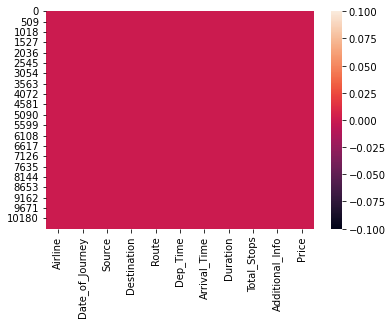

In [18]:
# Visualizing the null valesof train data using heatmap.

sns.heatmap(train.isnull())

Here we can see the null values got removed successfully from train dataset.

<AxesSubplot:>

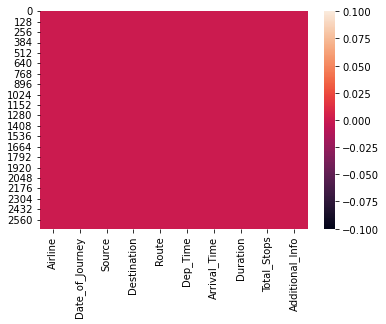

In [19]:
# Visualizing the null valesof test data using heatmap.

sns.heatmap(test.isnull())

# Exploratory Data Analysis

# Univariate  Analysis

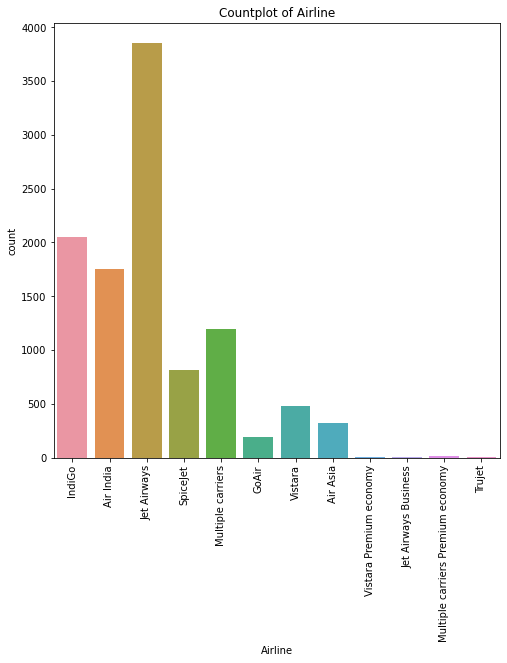

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [20]:
# Visualizing the Airline column using countplot.

plt.subplots(figsize=(8,8))
sns.countplot(x='Airline', data=train)
plt.title("Countplot of Airline")
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel("count")
plt.show()

train['Airline'].value_counts()

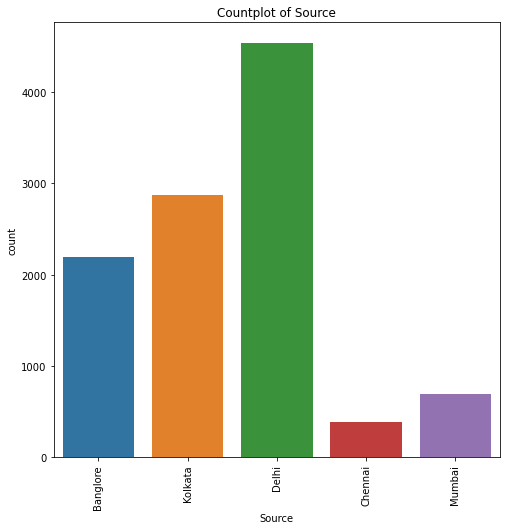

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [21]:
# Visualizing Source column using countplot.

plt.subplots(figsize=(8,8))
sns.countplot(x='Source', data=train)
plt.title("Countplot of Source")
plt.xticks(rotation=90)
plt.xlabel('Source')
plt.ylabel("count")
plt.show()

train['Source'].value_counts()

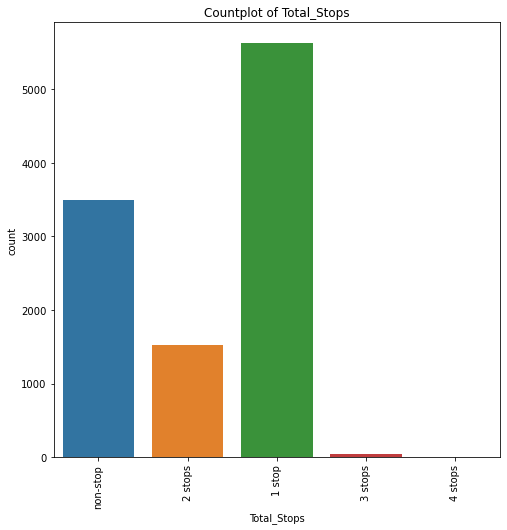

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [22]:
# Visualizing Total_Stops column using countplot.

plt.subplots(figsize=(8,8))
sns.countplot(x='Total_Stops', data=train)
plt.title("Countplot of Total_Stops")
plt.xticks(rotation=90)
plt.xlabel('Total_Stops')
plt.ylabel("count")
plt.show()

train['Total_Stops'].value_counts()

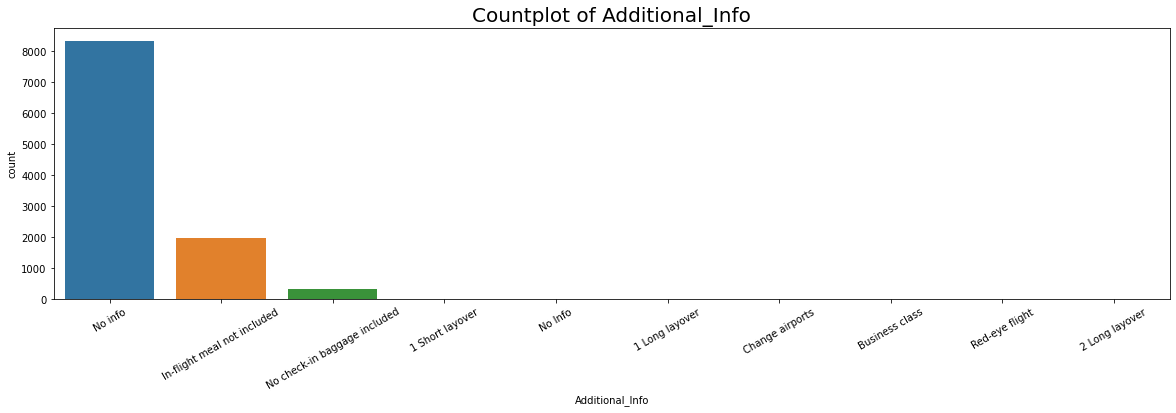

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


In [23]:
# Visualizing Addional_Info column using countplot.

plt.figure(figsize = (20,5))
ax=sns.countplot(x="Additional_Info", data=train) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Countplot of Additional_Info", fontsize = 20)
plt.show()
print(train['Additional_Info'].value_counts())

#  Observations of Univariate Analysis

Most of the Flights that fly belongs to 'Jet_Airways' Airline then 2nd most are of IndiGo Airlines and very least are of 'Trujet' Airlines.

Most no. of flights got taked off from 'Delhi' sourceand very least from Chennai.

Most of the flights takes only '1 stop' and very least/negligible flights take '4 stops'in total.

Most of the flights have 'No_info' and some have information about 'I-flight meal not included',some have information about 'No check-in baggage include' and so on.

# Bivariate Analysis

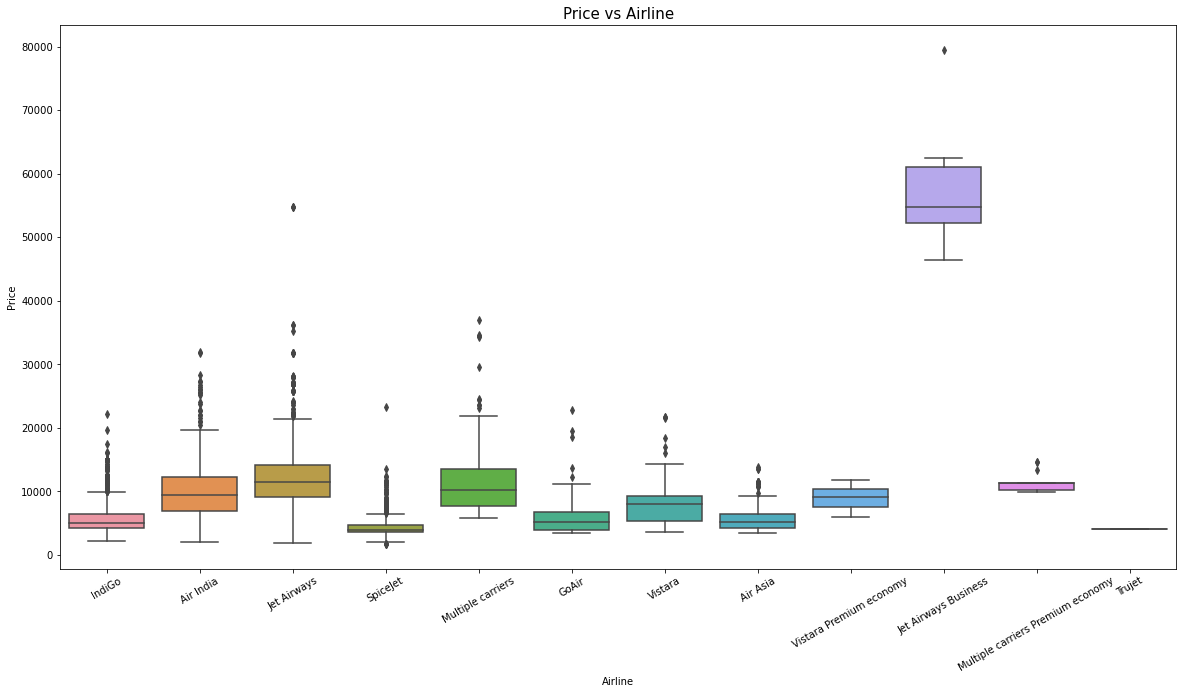

In [24]:
import warnings
warnings.filterwarnings('ignore')

# Visualizing Price vs Airline column using boxplot.
plt.figure(figsize = (20,10))
ax=sns.boxplot(train['Airline'], train['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Price vs Airline',fontsize=15)
plt.show()

In above graph, we can see jet Airways have high prices and spicejet has low prices,also Trujet have very negligible prices.



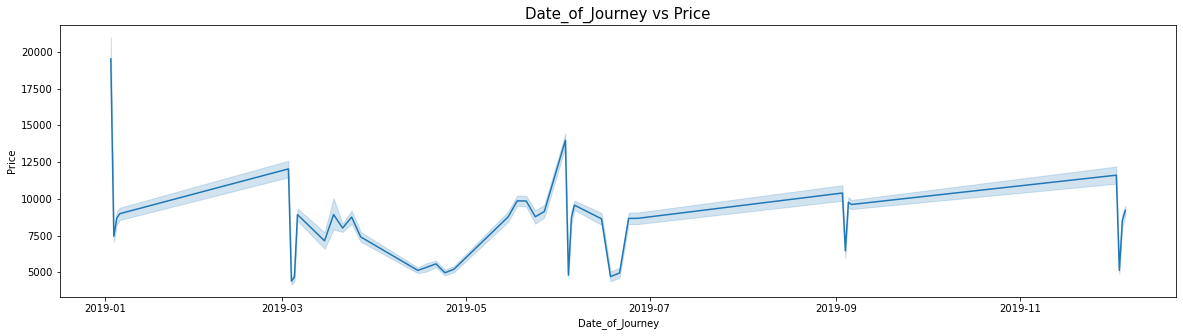

In [25]:
# Visualizing Date_of_Journey vs Price column line plot.

train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'])
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date_of_Journey",y="Price",  data=train)
plt.title("Date_of_Journey vs Price", fontsize = 15)
plt.show()

In January,flight prices got very high and then dropped to 7500, then in march prices dropped approximately below 5000,then In May prices were moderate then in july prices are same as of in amy then in August prices got raise but below 7500 then from August to November prices were constant.  

<Figure size 1440x432 with 0 Axes>

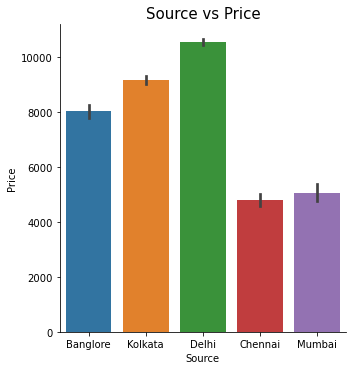

In [26]:
# Visualizing Source vs Price column using bar plot.

plt.figure(figsize=(20,6))
sns.catplot(x="Source", y="Price",kind='bar', data=train)
plt.title('Source vs Price',fontsize=15)
plt.show()


From above graph, Delhi source has highest prices then kolkata source has 2nd highest prices then banglore then mumbai and at last chennai has lowest prices as comapred to others. 

<Figure size 1440x432 with 0 Axes>

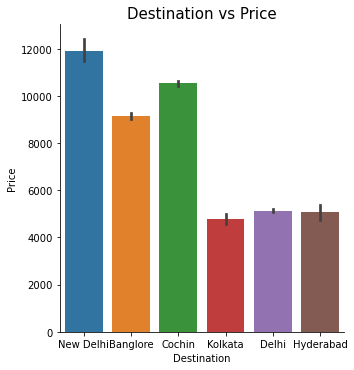

In [27]:
# Visualizing Destination vs Price using barplot.

plt.figure(figsize=(20,6))
sns.catplot(x="Destination", y="Price",kind='bar', data=train)
plt.title('Destination vs Price',fontsize=15)
plt.show()

From above graph, 'New Delhi' Destination has highest prices upto 12000 then 'Cochin'Destination has 2nd highest prices above 10000 and 'Kolkata' Destination has lowest prices above 4000. 

<Figure size 1440x432 with 0 Axes>

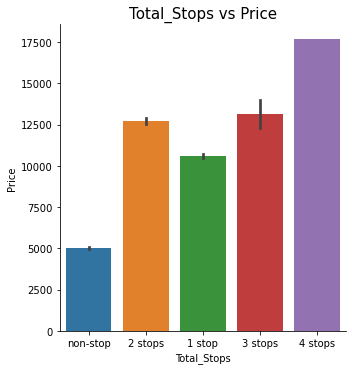

In [28]:
# Visualizing Total_Stops vs Price using bar plot.

plt.figure(figsize=(20,6))
sns.catplot(x="Total_Stops", y="Price",kind='bar', data=train)
plt.title('Total_Stops vs Price',fontsize=15)
plt.show()

Flights having 4 stops have highest prices and non-stop flights have lowest prices.

<Figure size 2160x432 with 0 Axes>

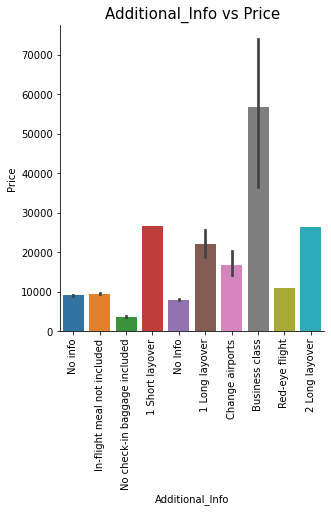

In [29]:
# Visualizing Additional_Info vs Price using bar plot.

plt.figure(figsize=(30,6))
sns.catplot(x="Additional_Info", y="Price",kind='bar', data=train)
plt.title('Additional_Info vs Price',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The Flight prices are too low when No check-in baggage were allowed.
When customer choose Business Class that time Price goes too high.
When No meal provided in Flight that time flight prices are always lesser than 20,000.

# Feature Engineering

In [30]:
# Checking the unique values will number count.

train['Additional_Info'].value_counts(ascending=True)

1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
No Info                            3
Business class                     4
Change airports                    7
1 Long layover                    19
No check-in baggage included     320
In-flight meal not included     1982
No info                         8345
Name: Additional_Info, dtype: int64

We can clearly see that column 'No Info' is two time repeated that means there are two 'No Info' columns we have to merge them in one.

In [31]:
# Combining two No Info  columns to one and renaming them as no info.

train["Additional_Info"]=train["Additional_Info"].replace("No Info","no info")

In [32]:
# Replacing String to numeric for better prediction.

train.replace({"non-stop": 0, 
                      "1 stop": 1, 
                      "2 stops": 2, 
                      "3 stops": 3, 
                      "4 stops": 4
                     }, inplace = True)

In [33]:
# Checking first 5 rows after encoding string columns to numerics.

train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [34]:
# Converting Duration from string to numbers.
# Converting hours and mins into single figure for model prediction.

train['hour'] = train['Duration'].str.split("h").str[0]
train['nothing'] = train['Duration'].str.split(" ").str[1]
train['minute'] = train['nothing'].str.split("m").str[0]
train.drop('nothing',axis=1,inplace=True)

In [35]:
# We will change hours to zero and mins to 5.

for i in range(0,10682):
    if(train['hour'][i] == '5m'):
        train["hour"][i] = 0
        train["minute"][i] = 5

In [36]:
# Converting hours and mins into only minutes.
# Replacing null values with 0.

train['hour'] = pd.to_numeric(train['hour']) 
train['minute'] = pd.to_numeric(train['minute']) 
train['minute']=train['minute'].replace(np.NaN,0) 
train['minute'] = train['minute'].astype('int64') 
train['Duration'] =train['hour']*60 + train['minute'] 
train.drop('hour',axis=1,inplace=True)
train.drop('minute',axis=1,inplace=True) 
train.head() 


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302


In [37]:
# Converting 'Dep_Time' into minutes for further process.

train['Dep_Time'] = pd.to_datetime(train['Dep_Time'],format = '%H:%M').dt.hour*60 + pd.to_datetime(train['Dep_Time'],format = '%H:%M').dt.minute


In [38]:
# Converting date into numeric form.

import datetime as dt
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'])
train['Date_of_Journey'] = train['Date_of_Journey'].map(dt.datetime.toordinal)
train.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,737142,Banglore,New Delhi,BLR → DEL,1340,01:10 22 Mar,170,0,No info,3897
1,Air India,737064,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,13:15,445,2,No info,7662
2,Jet Airways,737308,Delhi,Cochin,DEL → LKO → BOM → COK,565,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,737398,Kolkata,Banglore,CCU → NAG → BLR,1085,23:30,325,1,No info,6218
4,IndiGo,737062,Banglore,New Delhi,BLR → NAG → DEL,1010,21:35,285,1,No info,13302


In [39]:
# We will drop irrelevent columns that are Route and Arrival_Time.

train.drop('Route',axis=1,inplace=True)
train.drop('Arrival_Time',axis=1,inplace=True)

# Label Encoding

In [40]:
# Separating the features that need encoding.

category=['Airline','Source','Destination','Additional_Info']

In [41]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
train[category]= train[category].apply(la.fit_transform)

In [42]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,3,737142,0,5,1340,170,0,7,3897
1,1,737064,3,0,350,445,2,7,7662
2,4,737308,2,1,565,1140,2,7,13882
3,3,737398,3,0,1085,325,1,7,6218
4,3,737062,0,5,1010,285,1,7,13302


In [43]:
# As our dataset is totally in numerical foemat we can check the statistical summary of the dataset.

train.describe()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,737208.509033,1.952261,1.436113,773.852382,643.093232,0.824207,6.582701,9087.064121
std,2.352155,89.113653,1.177221,1.474782,344.964055,507.862001,0.675199,0.839022,4611.359167
min,0.000000,737062.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,1759.000000
25%,3.000000,737142.000000,2.000000,0.000000,480.000000,170.000000,0.000000,7.000000,5277.000000
50%,4.000000,737203.000000,2.000000,1.000000,710.000000,520.000000,1.000000,7.000000,8372.000000
75%,4.000000,737237.000000,3.000000,2.000000,1085.000000,930.000000,1.000000,7.000000,12373.000000
max,11.000000,737399.000000,4.000000,5.000000,1435.000000,2860.000000,4.000000,9.000000,79512.000000


From above, we observe that the total count of all columns is 10683 thatmeans our data doesn't contains any null value,but we can see values are showing vast difference of mean,std,min,max that means our data is not normalize, it needs standardization, we will do it later.

# Multivariate Analysis

<Figure size 2880x2880 with 0 Axes>

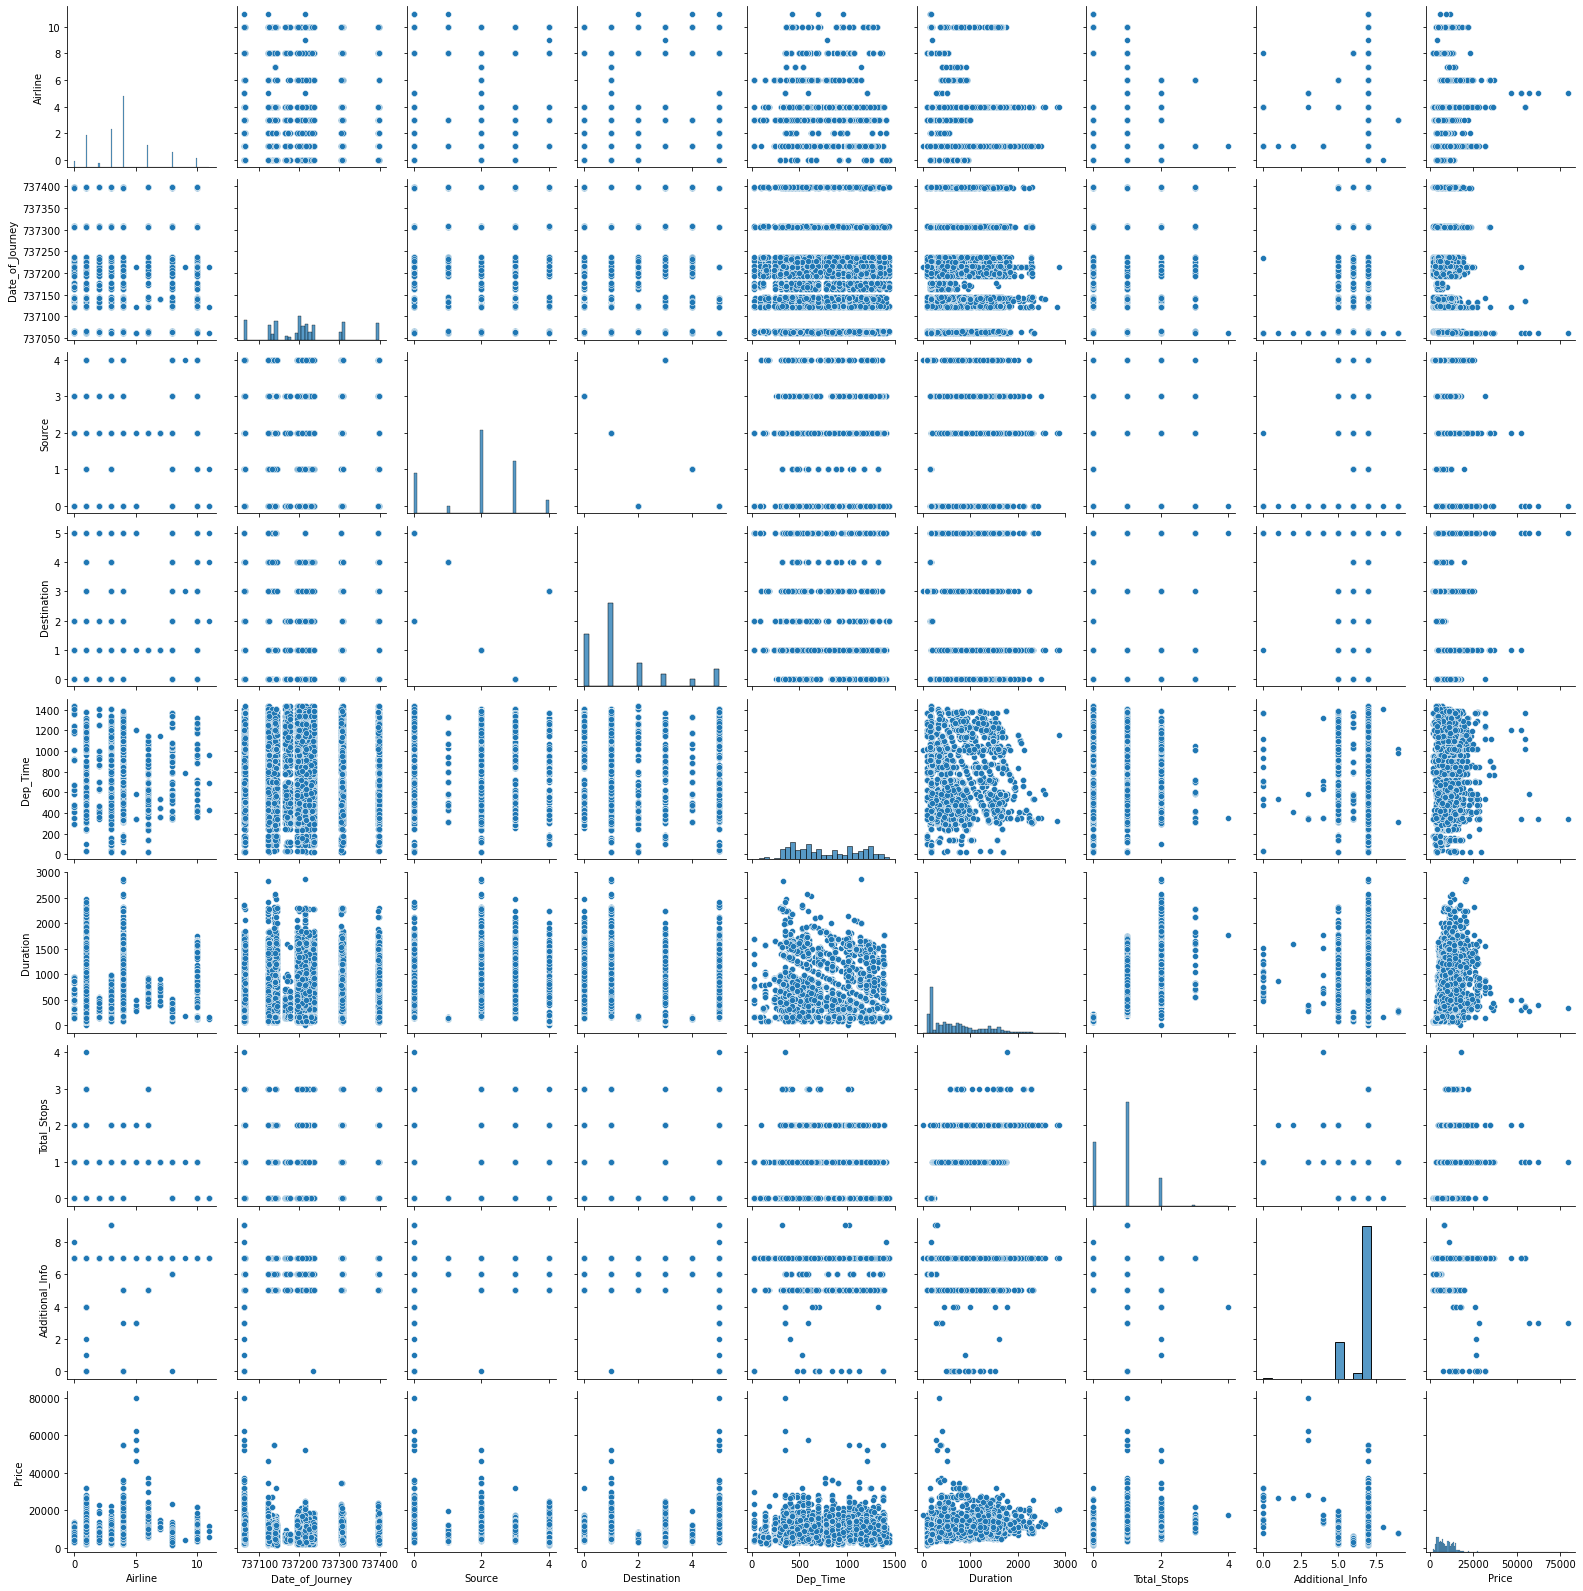

In [44]:
# Visualizing the pairwise relationship between columns.

plt.figure(figsize=(40,40))
sns.pairplot(train)
plt.show()

From pairplot,we can say that the features and traget column don't show any linear relationship with each other.

# Checking the Correlation

In [45]:
train.corr()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,-0.005087,-0.013401,0.018479,-0.038456,-0.159803,-0.199411,-0.077980,-0.039520
Date_of_Journey,-0.005087,1.000000,0.065229,-0.112650,0.028756,0.052721,0.064629,-0.004467,-0.004710
Source,-0.013401,0.065229,1.000000,-0.592574,0.055935,0.161874,0.192840,-0.016949,0.015998
Destination,0.018479,-0.112650,-0.592574,1.000000,-0.066011,-0.257365,-0.295481,0.014692,-0.071112
Dep_Time,-0.038456,0.028756,0.055935,-0.066011,1.000000,0.000971,-0.061623,-0.049468,0.005485
Duration,-0.159803,0.052721,0.161874,-0.257365,0.000971,1.000000,0.738025,-0.153282,0.506371
Total_Stops,-0.199411,0.064629,0.192840,-0.295481,-0.061623,0.738025,1.000000,-0.067536,0.603883
Additional_Info,-0.077980,-0.004467,-0.016949,0.014692,-0.049468,-0.153282,-0.067536,1.000000,-0.063848
Price,-0.039520,-0.004710,0.015998,-0.071112,0.005485,0.506371,0.603883,-0.063848,1.000000


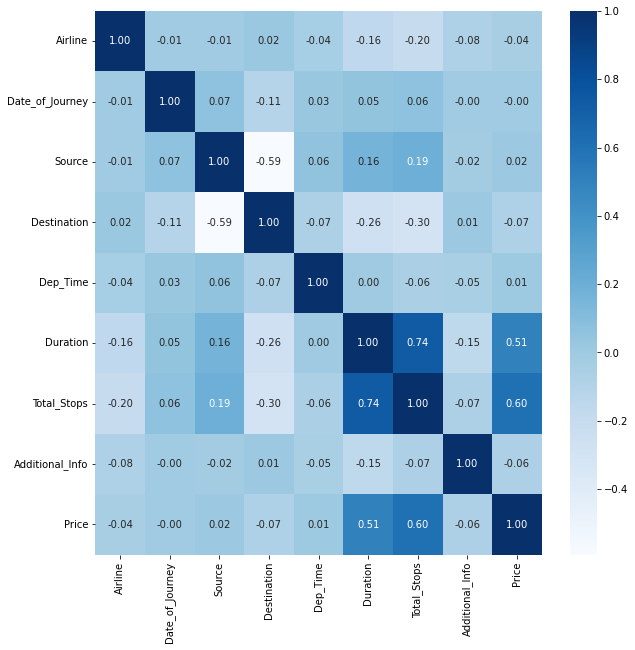

In [46]:
# Visualizing correlation using heatmap for better understanding.
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,cmap='Blues',fmt='0.2f')
plt.show()

Here form above heatmap, we see that prices are highly correlated with Duration and Total_Stops and negatively correlated with Airline,Additional_Info and Destination.

In [47]:
numerical=train[['Airline','Date_of_Journey','Source','Destination','Dep_Time','Duration','Total_Stops','Additional_Info','Price']]

# Outlier Handling

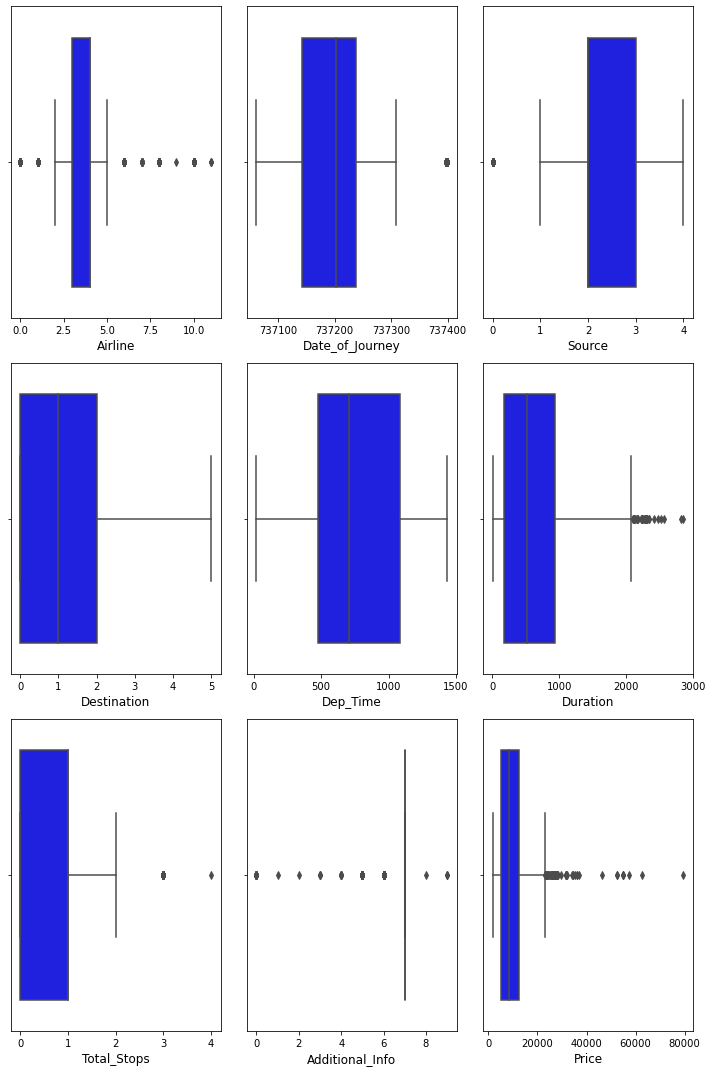

In [48]:
# Visualizing the outliers in dataset using boxplot.

plt.figure(figsize=(10,15))
plotnumber=1
for column in numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(train[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

The columns 'Airline','Date_of_Journey','Source','Duration','Total_Stops','Additional_Info','Price' have outliers,we will treat them.

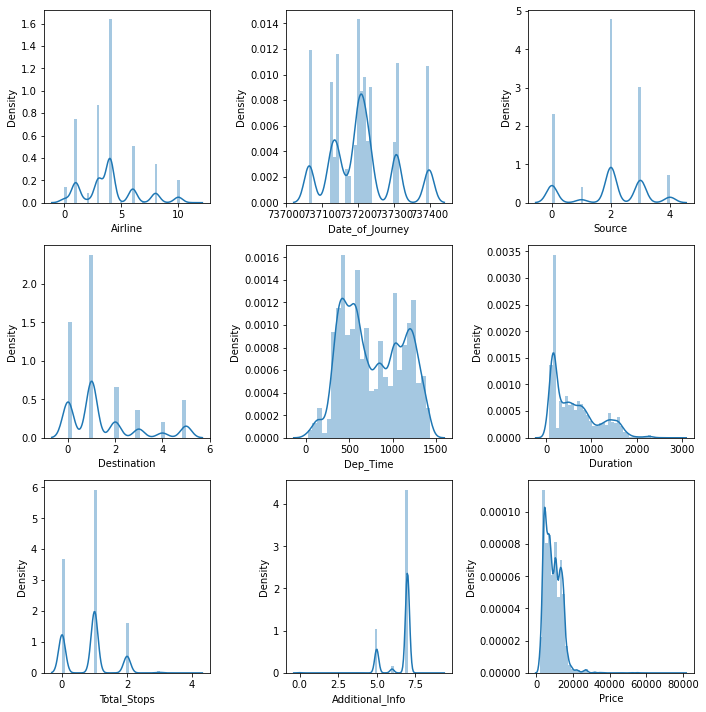

In [49]:
# Visualizing numerical features using dist plot.

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distplot, we can see that our dataset is not look normal,it needs standardization. 

In [50]:
# Separating the columns having outliers for outlier removal using Zscore method.

outliers=train[['Airline','Date_of_Journey','Source','Duration','Total_Stops','Additional_Info','Price']]

In [51]:
# Outliers handling using zscore.

from scipy.stats import zscore
z=np.abs(zscore(outliers))
train_new=train[(z<3).all(axis=1)]
train_new.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,3,737142,0,5,1340,170,0,7,3897
1,1,737064,3,0,350,445,2,7,7662
2,4,737308,2,1,565,1140,2,7,13882
3,3,737398,3,0,1085,325,1,7,6218
4,3,737062,0,5,1010,285,1,7,13302


We successfully removed the outliers from tha train dataset.

In [52]:
# Shape of dataset after outlier handling.

train_new.shape

(10475, 9)

In [53]:
# Shape of original dataset.

train.shape

(10683, 9)

In [54]:
# Data loss after outlier removal.

Data_loss=((10683-10475)/10683)*100
Data_loss

1.9470186277262942

Here we got data loss of 1.9470 that means there is not that much data loss after outlier removal, it is not more than 10%.

# Checking Skewness

In [55]:
train_new.skew()

Airline            0.730109
Date_of_Journey    0.486566
Source            -0.438959
Destination        1.266475
Dep_Time           0.113216
Duration           0.779912
Total_Stops        0.230633
Additional_Info   -1.456902
Price              0.415788
dtype: float64

In [56]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for i in train_new.columns:
    if abs(train_new.loc[:,i].skew())>0.55:
        train_new.loc[:,i]=pt.fit_transform(train_new.loc[:,i].values.reshape(-1,1))

In [57]:
train_new.skew()

Airline           -0.013402
Date_of_Journey    0.486566
Source            -0.438959
Destination        0.041017
Dep_Time           0.113216
Duration          -0.046552
Total_Stops        0.230633
Additional_Info    0.852542
Price              0.415788
dtype: float64

In [58]:
# Separating the Input and Output variables.
# x=features
# y=traget

x = train_new.drop(["Price"], axis=1)
y = train_new["Price"]

In [59]:
# Shape of x
x.shape

(10475, 8)

In [60]:
# Shape of Y

y.shape

(10475,)

# Data Scaling

In [61]:
# Data scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler() 
new = scaled.fit(x)  
scale_x = new.transform(x)

scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Prit

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,0.419360,0.237389,0.00,1.000000,0.932862,0.482236,0.0,0.111697
1,0.176956,0.005935,0.75,0.000000,0.233216,0.660378,1.0,0.111697
2,0.515086,0.729970,0.50,0.440768,0.385159,0.856249,1.0,0.111697
3,0.419360,0.997033,0.75,0.000000,0.752650,0.599840,0.5,0.111697
4,0.419360,0.000000,0.00,1.000000,0.699647,0.575230,0.5,0.111697


Our dataset is scaled now

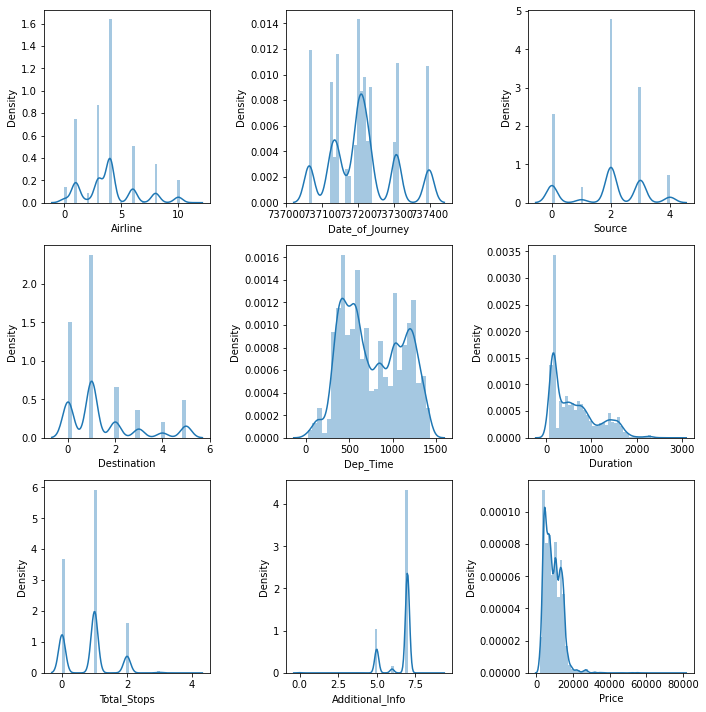

In [62]:
# Visualizing numerical features using dist plot.

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Checking the VIF

In [63]:
# Checking the multicolinearity after applying VIF to data.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,5.881337,Airline
1,3.704270,Date_of_Journey
2,4.854972,Source
3,3.492785,Destination
4,5.504580,Dep_Time
5,26.152603,Duration
6,6.841359,Total_Stops
7,4.007421,Additional_Info


Multicollinearity only affects the predictor variables that are correlated with one another. As we are interested in a predictor variable in the model that doesn’t suffer from multicollinearity, then multicollinearity isn’t a concern.

# Spliting the train dataset into train and test

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Random Forest Regressor

In [65]:
# Finding the best random state.

max_r2=0
maxRS=0

for i in range(0,200):
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred_rf=rf.predict(x_test)
    score = r2_score(y_test, pred_rf)
    if score>max_r2:
        max_r2=score
        maxRS=i
print("Best accuracy is ",max_r2," on Random_state ",maxRS) 

Best accuracy is  0.9119940675700987  on Random_state  190


In [66]:
print("R2 Score:                ", r2_score(y_test,pred_rf))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_rf))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_rf))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_rf)))


R2 Score:                 0.8890805643100186
Mean Absolute Error:      737.9581306436338
Mean Squared error:       1793406.5645977068
Root Mean Squared Error:  1339.1813038560936


In [67]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=190)

# Linear Regression

In [68]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("R2 Score:                ", r2_score(y_test,pred_lr))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_lr))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_lr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))


R2 Score:                 0.539170549166942
Mean Absolute Error:      2163.5887120344855
Mean Squared error:       7529453.857853747
Root Mean Squared Error:  2743.985032366931


# DecisionTree Regressor

In [69]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("R2 Score:                ", r2_score(y_test,pred_dt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_dt))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_dt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_dt)))


R2 Score:                 0.8568537079235681
Mean Absolute Error:      766.6984089101035
Mean Squared error:       2338855.294868735
Root Mean Squared Error:  1529.3316497309324


# KNeighbors Regressor

In [70]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("R2 Score:                ", r2_score(y_test,pred_knn))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_knn))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))


R2 Score:                 0.7831804156270359
Mean Absolute Error:      1211.0086873508353
Mean Squared error:       3542597.056381861
Root Mean Squared Error:  1882.1788056350706


# GradientBoostingRegressor

In [71]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print("R2 Score:                ", r2_score(y_test,pred_gbr))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_gbr))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_gbr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_gbr)))


R2 Score:                 0.8335387572017852
Mean Absolute Error:      1177.4383757492194
Mean Squared error:       2719796.3248755033
Root Mean Squared Error:  1649.1805009990578


# SVR

In [72]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print("R2 Score:                ", r2_score(y_test,pred_svr))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_svr))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_svr)))


R2 Score:                 0.12156299931270698
Mean Absolute Error:      3101.8127497575156
Mean Squared error:       14352708.690275272
Root Mean Squared Error:  3788.4968906249974


# Cross Validation

In [73]:
# Cross validation score of RandomForestRegressor.

cvs=cross_val_score(rf,x,y,cv=10)
print('Cross_validation_score for RandomForestRegressor is:',cvs.mean())

Cross_validation_score for RandomForestRegressor is: 0.8903255539528818


In [74]:
cvs=cross_val_score(lr,x,y,cv=10)
print('Cross_validation_score for LogisticRegression is:',cvs.mean())

Cross_validation_score for LogisticRegression is: 0.5136589798425507


In [75]:
cvs=cross_val_score(dt,x,y,cv=10)
print('Cross_validation_score for DecisionTreeRegressor is:',cvs.mean())

Cross_validation_score for DecisionTreeRegressor is: 0.8224657368478663


In [76]:
cvs=cross_val_score(knn,x,y,cv=10)
print('Cross_validation_score for KNeighborsRegressor is:',cvs.mean())

Cross_validation_score for KNeighborsRegressor is: 0.7689393245125407


In [77]:
cvs=cross_val_score(gbr,x,y,cv=10)
print('Cross_validation_score for GradientBoostingRegressor is:',cvs.mean())

Cross_validation_score for GradientBoostingRegressor is: 0.8205031810436649


In [78]:
cvs=cross_val_score(svr,x,y,cv=10)
print('Cross_validation_score for SVR is:',cvs.mean())

Cross_validation_score for SVR is: 0.13207829763192014


We choose the model on basis of lowest difference between model accuracy score and cross validation score of that model,we observe that we got less difference/almost equal score for RandomForestRegressor,so we will perform hyper parameter tunning for RandomForestRegressor.

# Hyper Parameter Tunning

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],
              'min_samples_leaf':range(1,5)
             }

In [80]:
gsv = GridSearchCV(rf, param_grid)
gsv.fit(x_train,y_train) 
gsv.best_params_  

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 15}

In [81]:
gsv_pred=gsv.best_estimator_.predict(x_test)

In [82]:
r2_score(y_test, gsv_pred)

0.90318818223356

# Saving the Model

In [83]:
import joblib
joblib.dump(gsv.best_estimator_,"Flight_Price_Prediction.obj")
rf_from_joblib=joblib.load('Flight_Price_Prediction.obj')
Predicted = rf_from_joblib.predict(x_test)
Predicted

array([ 7840.2       ,  9222.46666667, 14988.        , ...,
       10056.8       , 11569.53333333, 12870.73333333])

In [84]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([rf_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

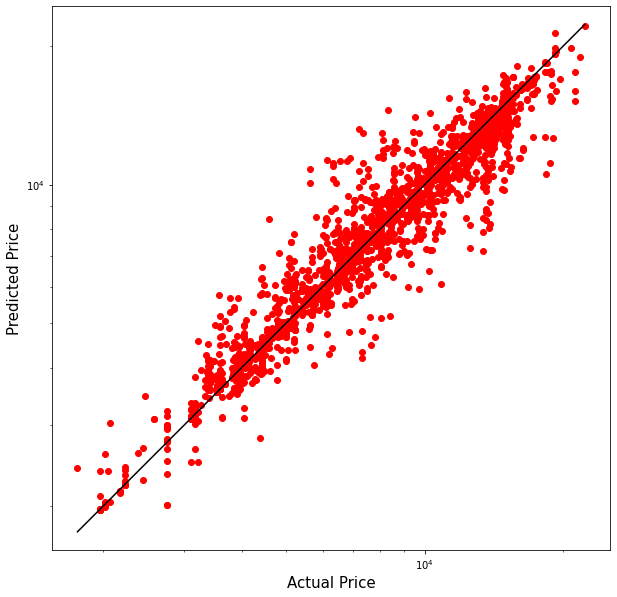

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='red')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test))
p2 = min(min(Predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-',c='black')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')
plt.show()

# Test Data

In [86]:
test.shape

(2671, 10)

In [87]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [89]:
test['Route'].fillna(test['Route'].mode()[0], inplace=True)
test['Total_Stops'].fillna(test['Total_Stops'].mode()[0], inplace=True)

In [90]:
# Replacing No Info to No info.

test["Additional_Info"]=test["Additional_Info"].replace("No Info","No info")

In [91]:
test.replace({"non-stop": 0,"1 stop": 1, "2 stops": 2, "3 stops": 3,"4 stops": 4}, inplace = True)

In [92]:
test['hour'] = test['Duration'].str.split("h").str[0]
test['nothing'] = test['Duration'].str.split(" ").str[1]
test['minute'] = test['nothing'].str.split("m").str[0]
test.drop('nothing',axis=1,inplace=True)

In [93]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,hour,minute
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,4,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,13,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,2,50


In [94]:
test.shape

(2671, 12)

In [95]:
for i in range(0,2670):
    if(test['hour'][i] == '5m'):
        test["hour"][i] = 0
        test["minute"][i] = 5

In [96]:
test['hour'] = pd.to_numeric(test['hour']) 
test['minute'] = pd.to_numeric(test['minute']) 
test['minute']=test['minute'].replace(np.NaN,0) 
test['minute'] = test['minute'].astype('int64')
test['Duration'] =test['hour']*60 + test['minute'] 
test.drop('hour',axis=1,inplace=True)
test.drop('minute',axis=1,inplace=True) 
test.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,0,No info


In [97]:
test['Dep_Time'] = pd.to_datetime(test['Dep_Time'],format = '%H:%M').dt.hour*60 + pd.to_datetime(test['Dep_Time'],format = '%H:%M').dt.minute


In [98]:
import datetime as dt
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'])
test['Date_of_Journey'] = test['Date_of_Journey'].map(dt.datetime.toordinal)
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,737216,Delhi,Cochin,DEL → BOM → COK,1050,04:25 07 Jun,655,1,No info
1,IndiGo,737398,Kolkata,Banglore,CCU → MAA → BLR,380,10:20,240,1,No info
2,Jet Airways,737200,Delhi,Cochin,DEL → BOM → COK,1155,19:00 22 May,1425,1,In-flight meal not included
3,Multiple carriers,737200,Delhi,Cochin,DEL → BOM → COK,480,21:00,780,1,No info
4,Air Asia,737234,Banglore,Delhi,BLR → DEL,1435,02:45 25 Jun,170,0,No info


In [99]:
test.drop('Route',axis=1,inplace=True)
test.drop('Arrival_Time',axis=1,inplace=True)

In [100]:
test.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,737216,Delhi,Cochin,1050,655,1,No info
1,IndiGo,737398,Kolkata,Banglore,380,240,1,No info


In [101]:
test.tail(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
2669,Air India,737213,Delhi,Cochin,240,915,1,No info
2670,Multiple carriers,737225,Delhi,Cochin,295,860,1,No info


In [102]:
test[category]= test[category].apply(la.fit_transform)

In [103]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,4,737216,2,1,1050,655,1,5
1,3,737398,3,0,380,240,1,5
2,4,737200,2,1,1155,1425,1,3
3,6,737200,2,1,480,780,1,5
4,0,737234,0,2,1435,170,0,5


# Checking the correlation(Test dataset)

In [104]:
# Checking Correlation.

test.corr()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
Airline,1.000000,0.003370,-0.031107,0.033630,0.001055,-0.182438,-0.232756,-0.084423
Date_of_Journey,0.003370,1.000000,0.049573,-0.106751,0.005237,0.087360,0.078992,-0.010708
Source,-0.031107,0.049573,1.000000,-0.578296,0.052454,0.149235,0.184311,-0.025205
Destination,0.033630,-0.106751,-0.578296,1.000000,-0.040461,-0.245068,-0.288944,0.026295
Dep_Time,0.001055,0.005237,0.052454,-0.040461,1.000000,-0.019215,-0.107903,-0.072470
Duration,-0.182438,0.087360,0.149235,-0.245068,-0.019215,1.000000,0.732406,-0.141044
Total_Stops,-0.232756,0.078992,0.184311,-0.288944,-0.107903,0.732406,1.000000,-0.050236
Additional_Info,-0.084423,-0.010708,-0.025205,0.026295,-0.072470,-0.141044,-0.050236,1.000000


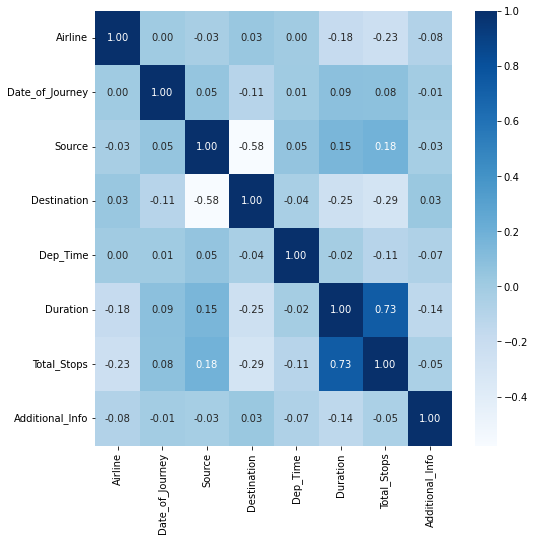

In [105]:
# Visualizing correlation using heatmap.

plt.figure(figsize=(8,8))
sns.heatmap(test.corr(),annot=True,cmap='Blues',fmt='0.2f')
plt.show()

# Outliers Handling(Test Data)

In [106]:
numerics=test[['Airline','Date_of_Journey','Source','Destination','Dep_Time','Duration','Total_Stops','Additional_Info']]

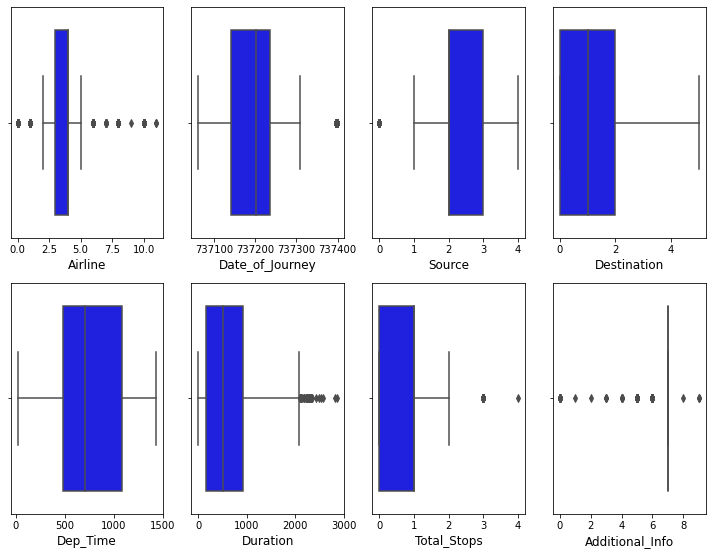

In [107]:
# Visualizing the outliers in dataset using boxplot.

plt.figure(figsize=(10,15))
plotnumber=1
for column in numerics:
    if plotnumber<=8:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(train[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [108]:
# Separating the features having outliers.

Outliers=outliers=test[['Airline','Date_of_Journey','Source','Duration','Total_Stops','Additional_Info']]

In [109]:
# Outliers handling using zscore.

from scipy.stats import zscore
z=np.abs(zscore(Outliers))
test_new=test[(z<3).all(axis=1)]
test_new.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,4,737216,2,1,1050,655,1,5
1,3,737398,3,0,380,240,1,5
2,4,737200,2,1,1155,1425,1,3
3,6,737200,2,1,480,780,1,5
4,0,737234,0,2,1435,170,0,5


In [110]:
# Shape of dataset after outlier removal.

test_new.shape

(2640, 8)

In [111]:
# Data loss after outlier removal.

Data_loss=((2671-2640)/2671)*100
Data_loss

1.1606140022463498

Dataloss is not more than 10%

# Checking the Skewness

In [112]:
test_new.skew()

Airline            0.479224
Date_of_Journey    0.454119
Source            -0.425340
Destination        1.261535
Dep_Time           0.092769
Duration           0.813446
Total_Stops        0.205464
Additional_Info   -1.649280
dtype: float64

In [113]:
# We will use powertransform for removing skewness.

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for i in test_new.columns:
    if abs(test_new.loc[:,i].skew())>0.55:
        test_new.loc[:,i]=pt.fit_transform(test_new.loc[:,i].values.reshape(-1,1))

In [115]:
test_new.skew()

Airline            0.479224
Date_of_Journey    0.454119
Source            -0.425340
Destination        0.039767
Dep_Time           0.092769
Duration          -0.052709
Total_Stops        0.205464
Additional_Info   -1.535448
dtype: float64

We successfully removed the skewness in the dataset.

# Test Data Scaling

In [117]:
X=test_new

In [119]:
# Data scaling using MinMaxScaler.

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() 
new = scale.fit(X)  
scale_x = new.transform(X) 

scaled_x = pd.DataFrame(scale_x, index=X.index, columns=X.columns)
X=scaled_x
X.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,0.4,0.456973,0.50,0.439690,0.726950,0.723130,0.5,1.0
1,0.3,0.997033,0.75,0.000000,0.251773,0.523724,0.5,1.0
2,0.4,0.409496,0.50,0.439690,0.801418,0.899682,0.5,0.0
3,0.6,0.409496,0.50,0.439690,0.322695,0.761021,0.5,1.0
4,0.0,0.510386,0.00,0.664262,1.000000,0.461984,0.0,1.0


In [120]:
# Predicted values for test dataset.

Predicted = rf_from_joblib.predict(X)
Predicted

array([ 6589.46666667,  4793.06666667,  9559.06666667, ...,
       10625.66666667, 12185.8       , 10404.6       ])